In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, confusion_matrix, auc, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder



In [43]:
data = pd.read_csv('BigCitiesHealth.csv')

In [44]:
data.dtypes

metric_item_label                   object
metric_cat_label                    object
metric_subcat_label                 object
metric_item_label_subtitle          object
metric_cat_item_yaxis_label         object
metric_source_desc_label_fn         object
metric_source_desc_label_url_fn     object
geo_label_city                      object
geo_label_state                     object
geo_label_citystate                 object
geo_fips_code                      float64
value                              float64
date_label                           int64
geo_label_proxy_or_real             object
geo_label_proxy_footnote            object
geo_fips_desc                       object
date_label_proxy_or_real            object
date_label_proxy_footnote           object
value_ci_flag_yesno                 object
value_95_ci_low                    float64
value_95_ci_high                   float64
value_90_ci_low                    float64
value_90_ci_high                   float64
geo_strata_

In [59]:
outcome_counts = data.groupby(['geo_label_city', 'metric_item_label']).size().reset_index(name='count')


In [64]:
top_outcomes = outcome_counts.groupby('metric_item_label').sum().sort_values(by='count', ascending=False).head(10).index


In [65]:
outcome_counts_top = outcome_counts[outcome_counts['metric_item_label'].isin(top_outcomes)]


In [66]:
pivot_table = pd.pivot_table(outcome_counts_top, values='count', index='geo_label_city', columns='metric_item_label', fill_value=0)


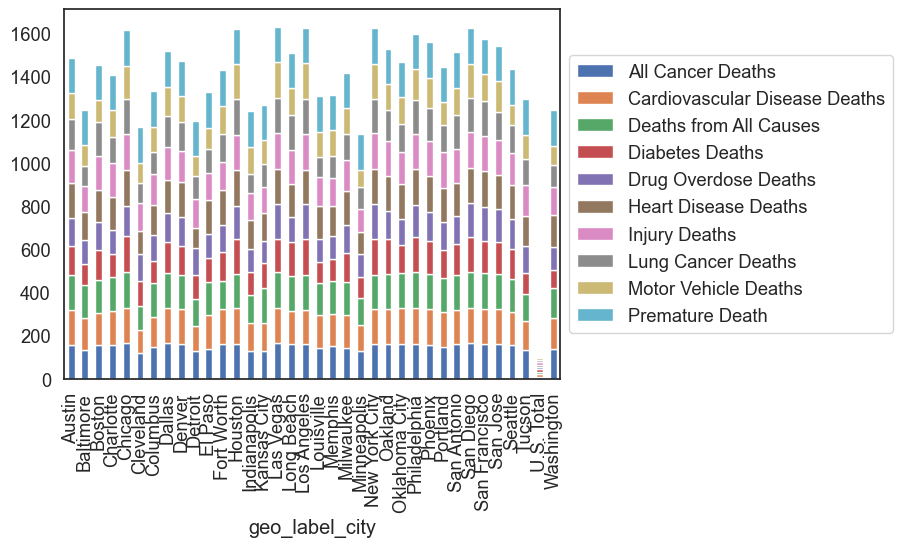

In [68]:
ax = pivot_table.plot(kind='bar', stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

